# Lecture - Pandas basics

data structures:
- pandas.Series
- pandas.DataFrame

will work with:
- read_csv
- indexing
- plotting

## Pandas Series

can create from dictionary  
can create from list  
can create from np.array    

In [449]:
# using dictionary
import pandas as pd

programs_dict = dict(AI = 26, NET = 38, Java = 30, UX = 28)

programs_series = pd.Series(programs_dict)
programs_series

AI      26
NET     38
Java    30
UX      28
dtype: int64

In [450]:
# extract values through indexing:
print(f"{programs_series[0] = }")
print(f"{programs_series[-1] = }")

print(f"{programs_series['UX'] = }")

# get keys:
print(f"{programs_series.keys() = }") # dtype = object for strings
print(f"{programs_series.keys()[0] = }")


programs_series[0] = 26
programs_series[-1] = 28
programs_series['UX'] = 28
programs_series.keys() = Index(['AI', 'NET', 'Java', 'UX'], dtype='object')
programs_series.keys()[0] = 'AI'


In [451]:
# using list
import random as rnd

rnd.seed(1337)

dice_series = pd.Series([rnd.randint(1, 6) for _ in range(10)])
dice_series.head() # show n first rows (default: 5)

0    5
1    5
2    6
3    3
4    5
dtype: int64

In [452]:
print(f"{dice_series.min() = }")
print(f"{dice_series.argmin() = }") # index of min value
print(f"{dice_series.max() = }")
print(f"{dice_series.mean() = }") # average
print(f"{dice_series.median() = }") # middle value of all values sorted, takes average of middle 2 if equal length

dice_series.min() = 2
dice_series.argmin() = 7
dice_series.max() = 6
dice_series.mean() = 4.4
dice_series.median() = 5.0


---
## DataFrame

- tabular data with rows and columns  
- analog to 2d numpy arrays with flexible row indices and column names (can think of like excel data)  
- "specialized" dictionary with col names mapped to a Series object  



In [453]:
# Instantiating DataFrame from Series object
df_programs = pd.DataFrame(programs_series, columns = ("Number_students",))
df_programs # df with 4 rows and 1 column

,Number_students
AI,26
NET,38
Java,30
UX,28


In [454]:
# create 2 Series objects
students = pd.Series({"AI": 26, "NET": 38, "UX": 28, "Java": 30})
skills = pd.Series({"AI": "Python", "NET": "C#", "UX": "Figma", "Java": "Java"})

# create DataFrame from the 2 Series objects
df_programs = pd.DataFrame({"Students": students, "Skills": skills})
df_programs # row and col names are key and Series object names respectively

,Students,Skills
AI,26,Python
NET,38,C#
UX,28,Figma
Java,30,Java


In [455]:
df_programs["Students"] # -> Series object

AI      26
NET     38
UX      28
Java    30
Name: Students, dtype: int64

In [456]:
df_programs["Students"].min() # can use Series methods since we get a Series object

26

In [457]:
df_programs["Students"].mean() # ignores any NaN values when calculating mean

30.5

In [458]:
median_student_number = df_programs["Students"].median()
print(f"Median students in the programs {df_programs.index.to_list()} is {median_student_number:.0f}")

Median students in the programs ['AI', 'NET', 'UX', 'Java'] is 29


In [459]:
df_programs

,Students,Skills
AI,26,Python
NET,38,C#
UX,28,Figma
Java,30,Java


In [460]:
df_programs["Skills"] # -> Serie with indices and values

AI      Python
NET         C#
UX       Figma
Java      Java
Name: Skills, dtype: object

In [461]:
df_programs["Skills"]["AI"] # -> value of key

'Python'

In [462]:
df_programs["Skills"][0] # -> value of index

'Python'

## Indexers

- loc - slicing and indexing using explicit index (key) - returns Series object
- iloc - slicing and indexing using Python-style indexing (regular slicing) - returns DataFrame object

In [463]:
df_programs

,Students,Skills
AI,26,Python
NET,38,C#
UX,28,Figma
Java,30,Java


In [464]:
df_programs.loc["AI"] # -> entire row based on key

Students        26
Skills      Python
Name: AI, dtype: object

In [465]:
df_programs.loc["AI":"UX"] # -> can use slicing based on key

,Students,Skills
AI,26,Python
NET,38,C#
UX,28,Figma


In [466]:
df_programs.iloc[0] # -> entire row based on index

Students        26
Skills      Python
Name: AI, dtype: object

In [467]:
df_programs.iloc[1:3] # can use slicing based on index


,Students,Skills
NET,38,C#
UX,28,Figma


## Masking

In [468]:
df_programs

,Students,Skills
AI,26,Python
NET,38,C#
UX,28,Figma
Java,30,Java


In [469]:
df_programs["Students"] >= 30

AI      False
NET      True
UX      False
Java     True
Name: Students, dtype: bool

In [470]:
# using masking to filter the DataFrame
df_programs[df_programs["Students"] >= 30] # returns a new DataFrame

,Students,Skills
NET,38,C#
Java,30,Java


In [471]:
df_programs # note that original DataFrame has not been mutated

,Students,Skills
AI,26,Python
NET,38,C#
UX,28,Figma
Java,30,Java


In [472]:
df_programs_over_29 = df_programs[df_programs["Students"] >= 30]
df_programs_over_29 # stored filtered df as a new df

,Students,Skills
NET,38,C#
Java,30,Java


---
## Excel data

In [473]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "../Data/calories.xlsx"
df = pd.read_excel(file_path)
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [475]:
df.shape # rows is the same as non-null, in other words all have values

(2225, 5)

In [476]:
# get all unique categories
print("\n".join(df["FoodCategory"].unique()))

CannedFruit
Fruits
Tropical&ExoticFruits
PotatoProducts
Vegetables
FastFood
Pizza
Cheese
CreamCheese
Milk&DairyProducts
SlicedCheese
Yogurt
Beef&Veal
ColdCuts&LunchMeat
Meat
Offal&Giblets
Pork
Poultry&Fowl
Sausage
Venison&Game
Cakes&Pies
Candy&Sweets
IceCream
(Fruit)Juices
AlcoholicDrinks&Beverages
Beer
Non-AlcoholicDrinks&Beverages
Soda&SoftDrinks
Wine
CerealProducts
Oatmeal,Muesli&Cereals
Pasta&Noodles
Dishes&Meals
Soups
Legumes
Nuts&Seeds
Oils&Fats
VegetableOils
BakingIngredients
Fish&Seafood
Herbs&Spices
Pastries,Breads&Rolls
Sauces&Dressings
Spreads


## Data cleaning and explorations

- type convert string objects with numerical values to int
- change column names
- separate into liquids and solids

In [477]:
df["per100grams"].unique() # cannot use these as numbers

array(['100g', '100ml'], dtype=object)

In [478]:
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [479]:
# renaming columns
df = df.rename(
    dict(Cals_per100grams = "Kcal", KJ_per100grams = "kJ", per100grams = "per100"),
    axis = "columns") # "columns" is same as axis = 1

df.head()

,FoodCategory,FoodItem,per100,Kcal,kJ
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [480]:
# converting calories to int
df["Kcal"] = df["Kcal"].str[:-3].astype(int) # using methods on methods like this is called chaining methods
df.head()

,FoodCategory,FoodItem,per100,Kcal,kJ
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ


In [481]:
df["Kcal"].head() # Kcal is now ints

0    62
1    48
2    92
3    88
4    54
Name: Kcal, dtype: int32

In [482]:
df["per100"].value_counts() # amount of each unique value

100g     1802
100ml     423
Name: per100, dtype: int64

In [483]:
# separate solids and liquids (g and ml)

# filter out all solids
df_solids = df[df["per100"] == "100g"] # using masking
df_solids.head()

,FoodCategory,FoodItem,per100,Kcal,kJ
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ


In [484]:
# filter out all liquids
df_liquids = df[df["per100"] == "100ml"]
df_liquids.head()

,FoodCategory,FoodItem,per100,Kcal,kJ
409,Milk&DairyProducts,Almond Milk,100ml,17,71 kJ
410,Milk&DairyProducts,Buttermilk,100ml,62,260 kJ
412,Milk&DairyProducts,Coconut Milk,100ml,230,966 kJ
422,Milk&DairyProducts,Hot Chocolate,100ml,89,374 kJ
423,Milk&DairyProducts,Kefir,100ml,55,231 kJ


In [485]:
df_solids["per100"].value_counts() # checking that only grams are represented in solids under per100

100g    1802
Name: per100, dtype: int64

In [486]:
# sorting to get the top 5 calorie rich solids
solids_sorted_calories = df_solids.sort_values(by = "Kcal", ascending = False)
solids_top5 = solids_sorted_calories.iloc[:5] # same as .head()
solids_top5

,FoodCategory,FoodItem,per100,Kcal,kJ
1621,Soups,Goulash,100g,1009,4238 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1756,Oils&Fats,Goose Fat,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ


In [487]:
liquids_sorted_calories = df_liquids.sort_values(by = "Kcal", ascending = False)
liquids_top5 = liquids_sorted_calories.iloc[:5]
liquids_top5

,FoodCategory,FoodItem,per100,Kcal,kJ
1751,Oils&Fats,Cod Liver Oil,100ml,1000,4200 kJ
1808,VegetableOils,Wheat Germ Oil,100ml,929,3902 kJ
1800,VegetableOils,Salmon Oil,100ml,911,3826 kJ
1789,VegetableOils,Menhaden Oil,100ml,911,3826 kJ
1759,Oils&Fats,Herring Oil,100ml,902,3788 kJ


In [488]:
# top 5 food categories
df["FoodCategory"].value_counts()

BakingIngredients                95
Cakes&Pies                       91
Herbs&Spices                     90
Beer                             85
Candy&Sweets                     81
Pastries,Breads&Rolls            78
Dishes&Meals                     78
Oatmeal,Muesli&Cereals           76
FastFood                         72
Vegetables                       63
Legumes                          62
Fish&Seafood                     60
Fruits                           54
Sauces&Dressings                 54
Cheese                           53
Soups                            52
Non-AlcoholicDrinks&Beverages    51
AlcoholicDrinks&Beverages        48
Sausage                          47
(Fruit)Juices                    46
Meat                             46
IceCream                         45
Soda&SoftDrinks                  45
CerealProducts                   44
Pizza                            43
Pasta&Noodles                    40
Yogurt                           40
Nuts&Seeds                  

In [489]:
df.groupby("FoodCategory") # gives groupby object

In [490]:
top5_calories_median = df.groupby("FoodCategory").median("Kcal").sort_values(by = "Kcal", ascending = False).head()
top5_calories_median

,Kcal
FoodCategory,
VegetableOils,884.0
Oils&Fats,883.0
Nuts&Seeds,534.0
Candy&Sweets,448.0
"Oatmeal,Muesli&Cereals",373.5


ValueError: Could not interpret input 'FoodCategory'

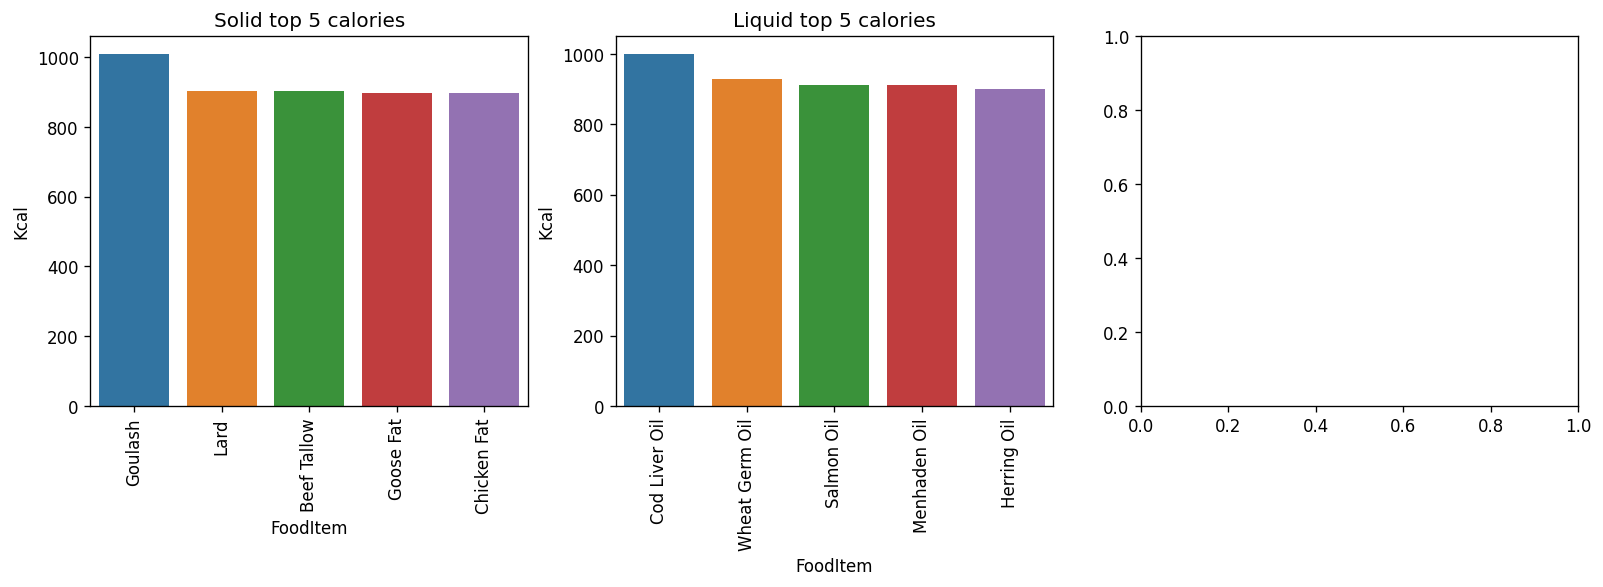

In [491]:
fig, axes = plt.subplots(1,3, figsize = (16, 4), dpi = 120)

titles = ["Solid top 5 calories", "Liquid top 5 calories", "Category top 5 calories (median)"]
data_frames = (solids_top5, liquids_top5, top5_calories_median)
x_columns = ["FoodItem", "FoodItem", "FoodCategory"]

for i, (title, data_frame) in enumerate(zip(titles, data_frames)):
    sns.barplot(data = data_frame, x = x_columns[i], y = "Kcal", ax = axes[i]) # y is name of the column
    axes[i].set(title = title)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 90)